# Filtros


In [1]:
# importar biblio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pywt

In [4]:
# ler tabela
df = pd.read_csv("../beats/data_beat_426783006.csv")

In [5]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,318,319,320,321,322,323,324,325,326,327
0,0,0.059,0.055,0.051,0.049,0.053,0.045,0.020,0.022,0.030,...,-0.047,-0.045,-0.053,-0.080,-0.124,-0.128,-0.116,-0.115,426783006.0,0.0
1,1,-0.080,-0.076,-0.075,-0.075,-0.075,-0.075,-0.076,-0.069,-0.081,...,-0.050,-0.049,-0.045,-0.045,-0.043,-0.037,-0.035,-0.035,426783006.0,0.0
2,2,-0.104,-0.091,-0.089,-0.085,-0.081,-0.074,-0.066,-0.067,-0.080,...,-0.005,0.004,0.008,0.013,0.013,0.000,-0.008,-0.019,426783006.0,0.0
3,3,-0.040,-0.032,-0.024,-0.034,-0.061,-0.075,-0.067,-0.062,-0.056,...,-0.117,-0.158,-0.135,-0.126,-0.117,-0.104,-0.092,-0.080,426783006.0,0.0
4,4,-0.075,-0.052,-0.081,-0.130,-0.120,-0.120,-0.116,-0.118,-0.126,...,-0.063,-0.065,-0.095,-0.100,-0.094,-0.094,-0.095,-0.121,426783006.0,0.0


In [6]:
# Tirar as colunas que não contém o sinal
df = df.drop(['Unnamed: 0','326','327'],axis= 1)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,316,317,318,319,320,321,322,323,324,325
0,0.059,0.055,0.051,0.049,0.053,0.045,0.020,0.022,0.030,0.028,...,-0.050,-0.050,-0.047,-0.045,-0.053,-0.080,-0.124,-0.128,-0.116,-0.115
1,-0.080,-0.076,-0.075,-0.075,-0.075,-0.075,-0.076,-0.069,-0.081,-0.103,...,-0.050,-0.050,-0.050,-0.049,-0.045,-0.045,-0.043,-0.037,-0.035,-0.035
2,-0.104,-0.091,-0.089,-0.085,-0.081,-0.074,-0.066,-0.067,-0.080,-0.089,...,-0.021,-0.018,-0.005,0.004,0.008,0.013,0.013,0.000,-0.008,-0.019
3,-0.040,-0.032,-0.024,-0.034,-0.061,-0.075,-0.067,-0.062,-0.056,-0.049,...,-0.093,-0.082,-0.117,-0.158,-0.135,-0.126,-0.117,-0.104,-0.092,-0.080
4,-0.075,-0.052,-0.081,-0.130,-0.120,-0.120,-0.116,-0.118,-0.126,-0.125,...,-0.064,-0.066,-0.063,-0.065,-0.095,-0.100,-0.094,-0.094,-0.095,-0.121


In [7]:
sig = np.array(df.iloc[0,:])


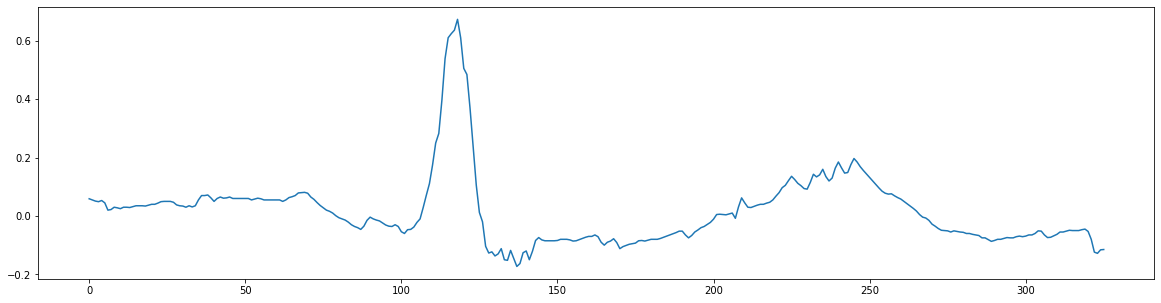

In [8]:
# Visualizar o sinal
plt.figure(figsize=(20,5))
plt.plot(sig)

In [9]:
print(signal)

<module 'scipy.signal' from '/home/matheus/.local/lib/python3.8/site-packages/scipy/signal/__init__.py'>


## Filtros

FIR

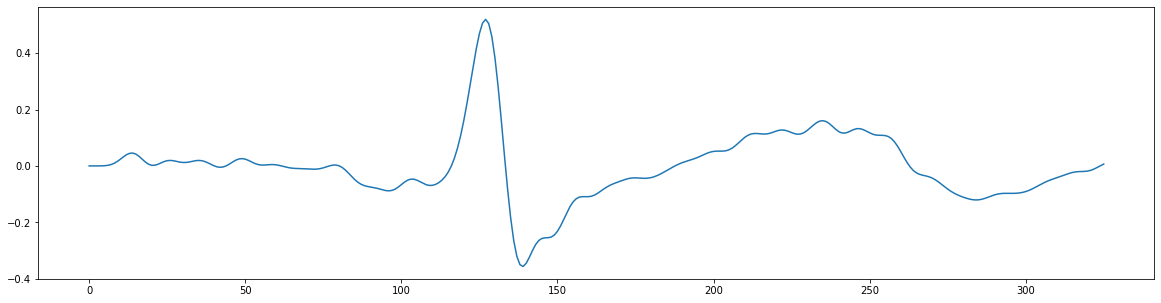

In [10]:
# Variáveis de controle
fs = 500 # Frequência de amostragem
fcLow = 0.5 # Frequência de corte baixa
fcHigh = 50 # Frequência de corte alta

sos = signal.butter(10, [fcLow, fcHigh], 'bandpass', fs=fs, output='sos', analog= False) # Criar filtro
filtered_fir = signal.sosfilt(sos, sig) # Convoluir filtro

plt.figure(figsize=(20,5))
plt.plot(filtered_fir) #plotar

Wavelet db2

Para criar o filtro de 500hz, pelo teorema de amostragem o sinal é de 250hz. pegando somente o sinal de 0 até 50hz (aprox) precisa dividir pela metade 2x

250 -> 125

125 -> 63

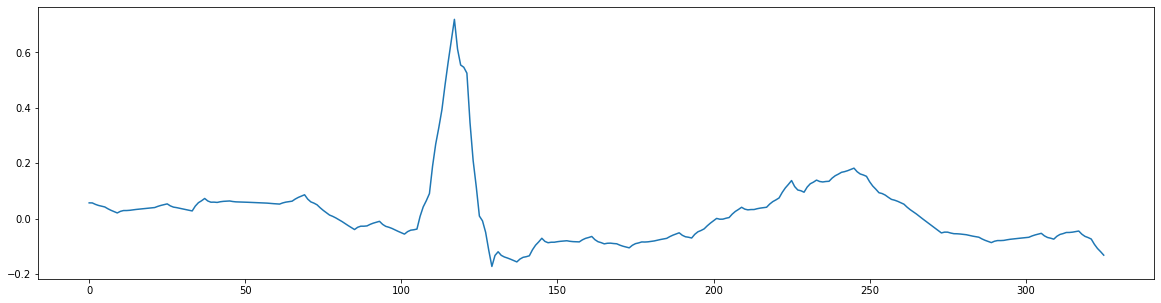

In [11]:
coeff = pywt.wavedec(sig, 'db2', level=2) # Gerar coeficientes dos sinais
cA2, cD2, cD1 = coeff # coeficientes do sinal
cD1 = 0*cD1 # zerar altas frequências
cD2 = 0*cD2 # zerar altas frequenceias
filtered_db2 = pywt.waverec([cA2,cD2,cD1], 'db2') # recosnstruir sinal

plt.figure(figsize=(20,5))
plt.plot(filtered_db2) #plotar

Wavelet db3

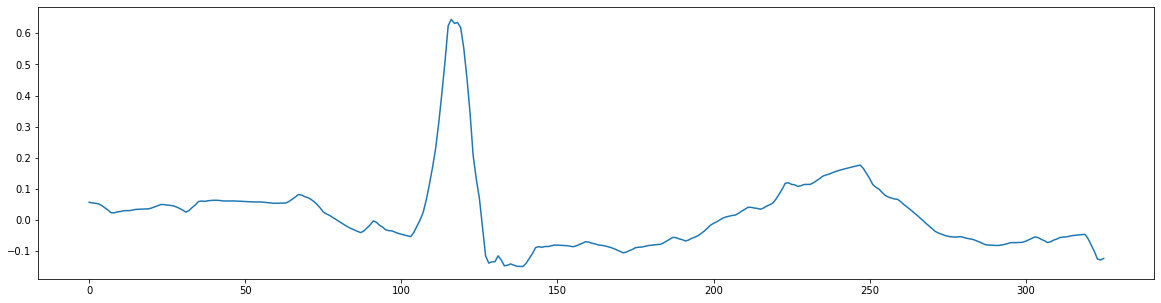

In [12]:
coeff = pywt.wavedec(sig, 'db3', level=2) # Gerar coeficientes dos sinais
cA2, cD2, cD1 = coeff # coeficientes do sinal
cD1 = 0*cD1 # zerar altas frequências
cD2 = 0*cD2 # zerar altas frequenceias
filtered_db3 = pywt.waverec([cA2,cD2,cD1], 'db3') # recosnstruir sinal

plt.figure(figsize=(20,5))
plt.plot(filtered_db3) #plotar

Wavelet db6

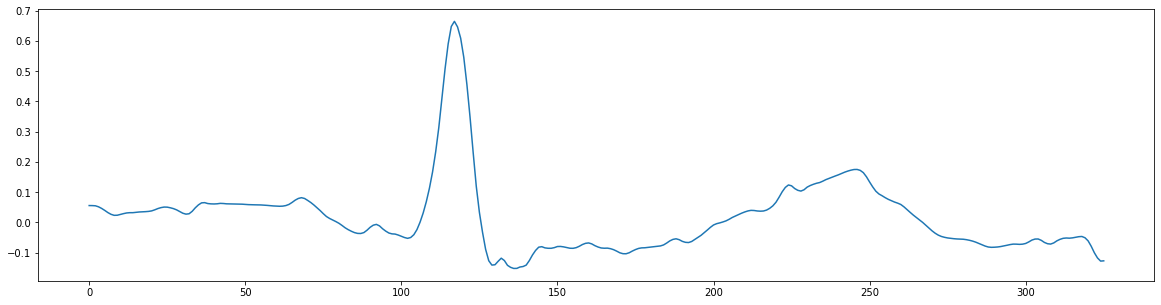

In [13]:
coeff = pywt.wavedec(sig, 'db6', level=2) # Gerar coeficientes dos sinais
cA2, cD2, cD1 = coeff # coeficientes do sinal
cD1 = 0*cD1 # zerar altas frequências
cD2 = 0*cD2 # zerar altas frequenceias
filtered_db6 = pywt.waverec([cA2,cD2,cD1], 'db6') # recosnstruir sinal

plt.figure(figsize=(20,5))
plt.plot(filtered_db6) #plotar

In [14]:
print(len(filtered_fir))
print(len(filtered_db2))
print(len(filtered_db3))
print(len(filtered_db6))

326
326
326
326
